-----------------
Fai un programa en Python que coa imaxe escaneada:

- Identifica os cuadrilateros da imaxe.

- Conta o número de "circulos" e encerraos dentro dun cuadrilatero

In [18]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("../../docs/Escaneo-cargador.jpg")
# es emborronar en la imagen : es lo de gaussian thre.-...


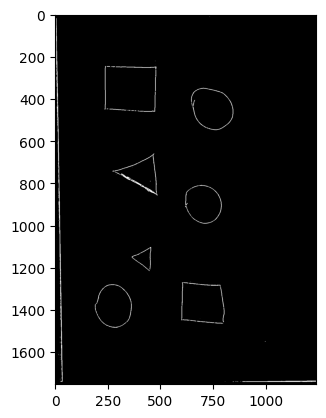

In [20]:
#convertir a escala de grises 
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # aplicar desenfoque 
blurMedian = cv.medianBlur(img_gray,5)
    # Primeramente invertimos la imagen es decir pasarlo a blanco y negro. porque cv se prioriza el blanco sobre el negro.
img_pre_inverted = cv.adaptiveThreshold(blurMedian,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
                                            cv.THRESH_BINARY,11,2)
    
img_inverse = cv.bitwise_not(img_pre_inverted)
plt.imshow(img_inverse, cmap='gray')


------------

# 🟦 Procesamiento de Imágenes 

---

## <span style="color:#1f6feb;">🎨 Escala de Grises</span>

Al ordenador le da igual si el cuadrado es **rojo** o **verde**.  
Solo le importa la **forma**.

Al pasar la imagen a **escala de grises**, eliminamos el color y nos quedamos únicamente con la **intensidad de luz** de cada píxel (qué tan claro u oscuro es).

Esto simplifica el procesamiento de la imagen.

---

## <span style="color:#1f6feb;">⚫⚪ Binarización (Blanco y Negro / Umbral)</span>

En este paso convertimos la imagen en **solo dos colores**:

- **Blanco puro** → objetos de interés  
- **Negro puro** → fondo  

Mediante un **umbral**, separamos claramente los objetos del fondo.

---

## <span style="color:#1f6feb;">✏️ Contornos</span>

OpenCV recorre la imagen y:

- Busca los píxeles blancos
- Une los que están conectados
- Dibuja una línea alrededor del objeto

Esa línea que rodea al objeto se llama **contorno**.

---

## <span style="color:#1f6feb;">🔑 Aproximación (La clave del ejercicio)</span>

Una vez obtenido el contorno, le preguntamos a OpenCV:

**¿Cuántas esquinas tiene esta figura?**

Según el número de esquinas:

- **4 esquinas** → es un **cuadrilátero**
- **Muchas esquinas (más de 8 o 10)** → probablemente es un **círculo**

Esto ocurre porque un círculo digital es, en realidad, un **polígono con muchos lados pequeños**.

---

### <span style="color:#1f6feb;">📌 Resumen</span>

1. Escala de grises → elimina el color  
2. Binarización → separa objeto y fondo  
3. Contornos → detecta los bordes  
4. Aproximación → identifica la forma
